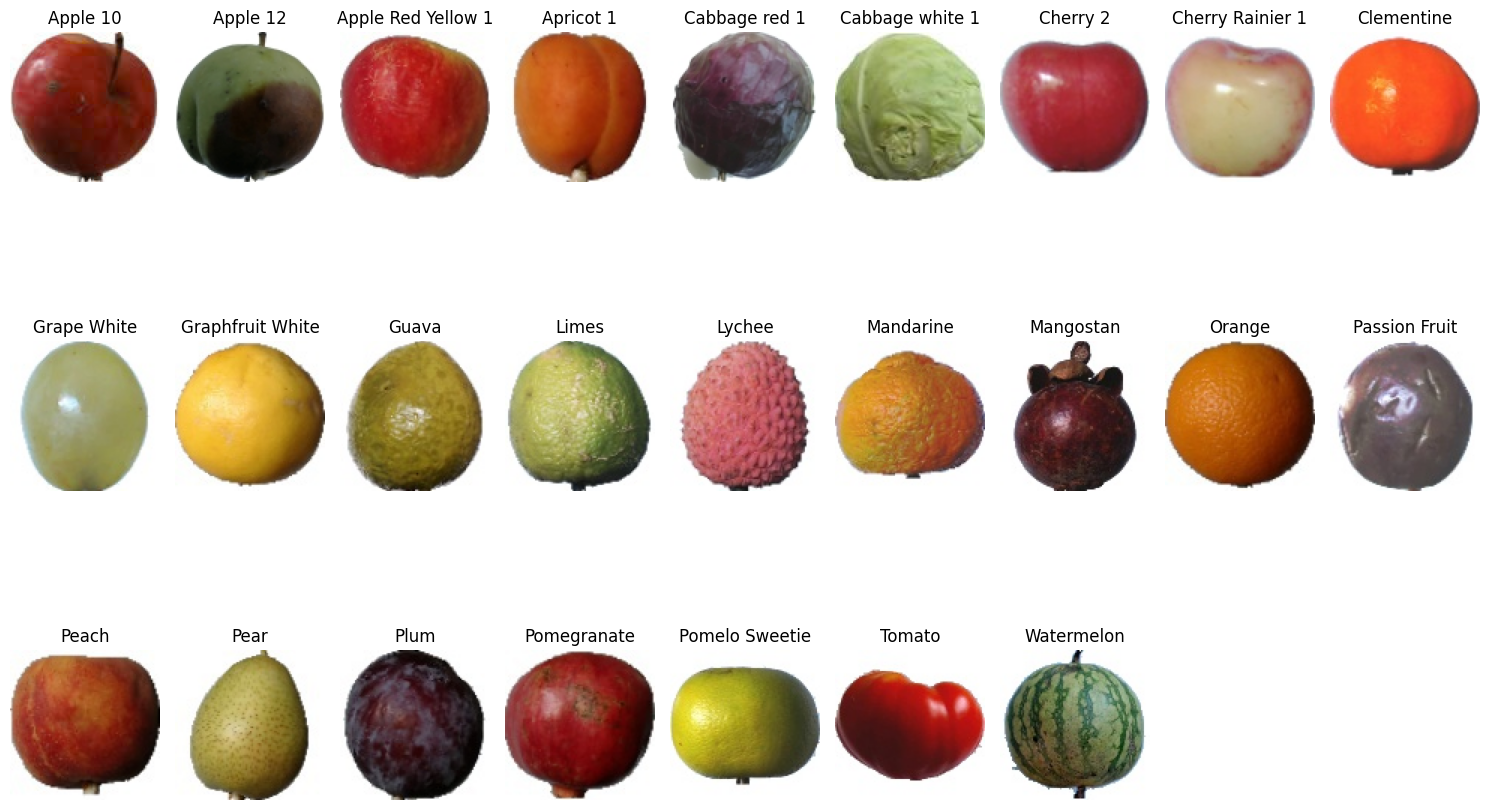

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Đường dẫn đến folder "Ảnh trái cây"
folder_path = "Ảnh trái cây"

# Duyệt qua các folder con
subfolders = ["Data_An", "Data_Lập", "Data_Minh"]
fruit_images = {}

for subfolder in subfolders:
    subfolder_path = os.path.join(folder_path, subfolder)
    if os.path.isdir(subfolder_path):
        # Duyệt qua các folder loại quả
        for fruit_folder in os.listdir(subfolder_path):
            fruit_folder_path = os.path.join(subfolder_path, fruit_folder)
            if os.path.isdir(fruit_folder_path):
                # Lấy danh sách ảnh trong folder loại quả
                images = os.listdir(fruit_folder_path)
                for image in images:
                    if image.lower().endswith(('.png', '.jpg', '.jpeg')):
                        # Lưu ảnh đầu tiên của mỗi loại quả
                        if fruit_folder not in fruit_images:
                            fruit_images[fruit_folder] = os.path.join(fruit_folder_path, image)
                        break

# Hiển thị mỗi loại quả một ảnh
plt.figure(figsize=(15, 10))
for i, (fruit, image_path) in enumerate(fruit_images.items()):
    img = mpimg.imread(image_path)
    plt.subplot(3, (len(fruit_images) + 2) // 3, i + 1)
    plt.imshow(img)
    plt.title(fruit)
    plt.axis('off')

plt.tight_layout()
plt.show()

Kích thước ảnh: (463, 432, 3)
Kích thước ảnh sau khi thay đổi: (100, 100, 3)
Histogram LBP: [0.0797 0.0675 0.0427 0.0669 0.0576 0.1231 0.0569 0.0808 0.2819 0.1429]
Ma trận LBP: [[3. 5. 5. ... 5. 5. 3.]
 [5. 8. 8. ... 8. 8. 5.]
 [5. 8. 8. ... 8. 8. 5.]
 ...
 [5. 8. 8. ... 8. 8. 5.]
 [5. 8. 8. ... 8. 8. 5.]
 [3. 5. 5. ... 5. 5. 3.]]
Số phần tử bằng 8: 2819


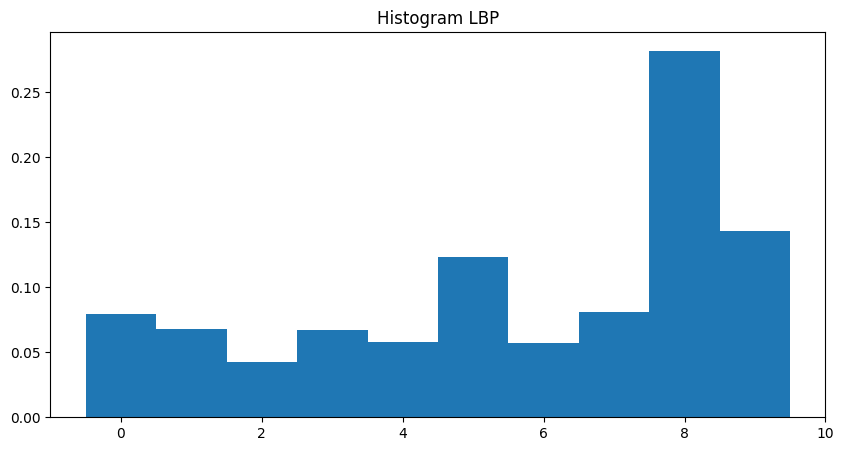

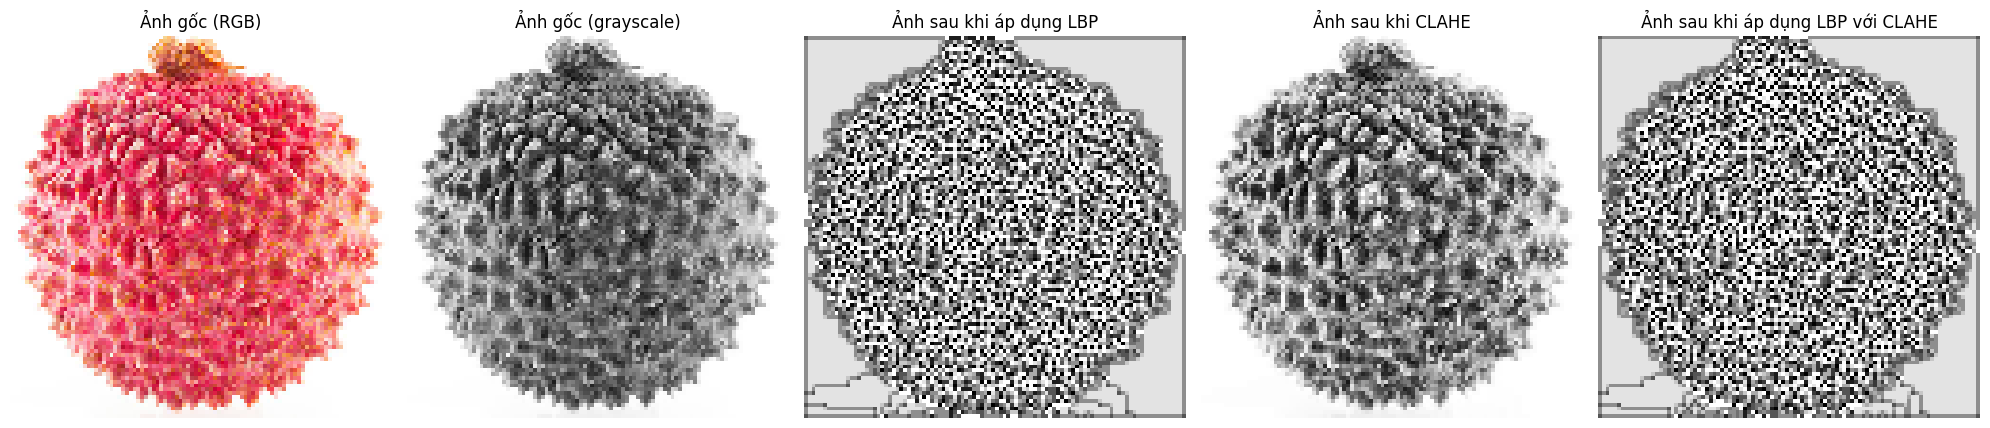

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

# Tham số cho LBP
LBP_RADIUS = 1
LBP_POINTS = 8 * LBP_RADIUS

# Đọc ảnh và chuyển sang grayscale
image_path = 'Image_test/Screenshot 2025-05-08 192729.png'  # Đường dẫn tới ảnh của bạn

image = cv2.imread(image_path)
# In ra kích thước của ảnh
print("Kích thước ảnh:", image.shape)
image = cv2.resize(image, (100, 100))  # Thay đổi kích thước ảnh về 300x300
print("Kích thước ảnh sau khi thay đổi:", image.shape)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(gray)

# Áp dụng LBP
lbp = local_binary_pattern(gray, LBP_POINTS, LBP_RADIUS, method="uniform")
(hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, LBP_POINTS + 3), range=(0, LBP_POINTS + 2))
hist = hist.astype("float")
hist /= (hist.sum() + 1e-7)
print("Histogram LBP:", hist)
# In ra ma trix LBP
print("Ma trận LBP:", lbp)
# Vẽ histogram LBP
plt.figure(figsize=(10, 5))
plt.bar(range(0, LBP_POINTS + 2), hist, width=1)
plt.title('Histogram LBP')

# Đếm số lượng pixel có giá trị LBP bằng 8
count_8 = np.sum(lbp == 8)
print("Số phần tử bằng 8:", count_8)
lbp_enhanced = local_binary_pattern(enhanced, LBP_POINTS, LBP_RADIUS, method="uniform")

# Hiển thị ảnh gốc và ảnh LBP
plt.figure(figsize=(20, 30))

plt.subplot(1, 5, 1)
plt.imshow(image_rgb)
plt.title('Ảnh gốc (RGB)')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(gray, cmap='gray')
plt.title('Ảnh gốc (grayscale)')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(lbp, cmap='gray')
plt.title('Ảnh sau khi áp dụng LBP')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(enhanced, cmap='gray')
plt.title('Ảnh sau khi CLAHE')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(lbp_enhanced, cmap='gray')
plt.title('Ảnh sau khi áp dụng LBP với CLAHE')
plt.axis('off')

plt.tight_layout()
plt.show()


Kích thước ảnh: (452, 430, 3)
Kích thước ảnh sau khi thay đổi: (100, 100, 3)
Histogram LBP: [0.0852 0.0708 0.0459 0.076  0.0821 0.1065 0.0515 0.0866 0.2383 0.1571]
Ma trận LBP: [[3. 5. 5. ... 5. 5. 3.]
 [5. 8. 8. ... 8. 8. 5.]
 [5. 8. 8. ... 8. 8. 5.]
 ...
 [5. 8. 8. ... 8. 8. 5.]
 [5. 8. 8. ... 8. 8. 5.]
 [3. 5. 5. ... 5. 5. 3.]]


(np.float64(-0.5), np.float64(99.5), np.float64(99.5), np.float64(-0.5))

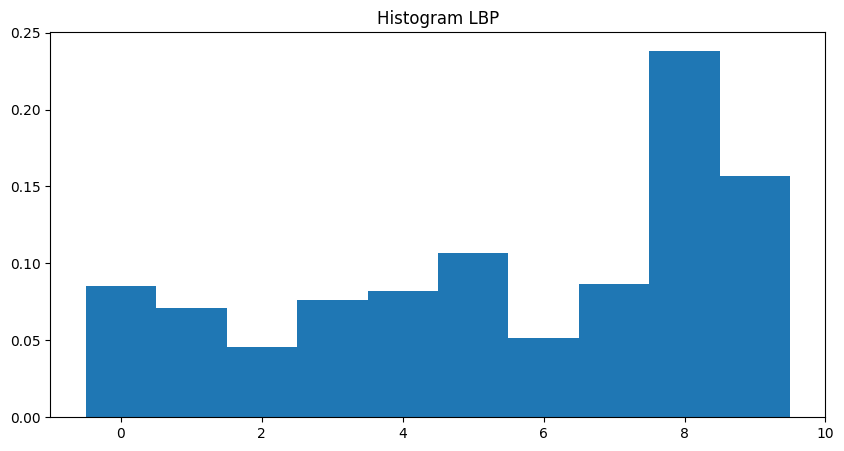

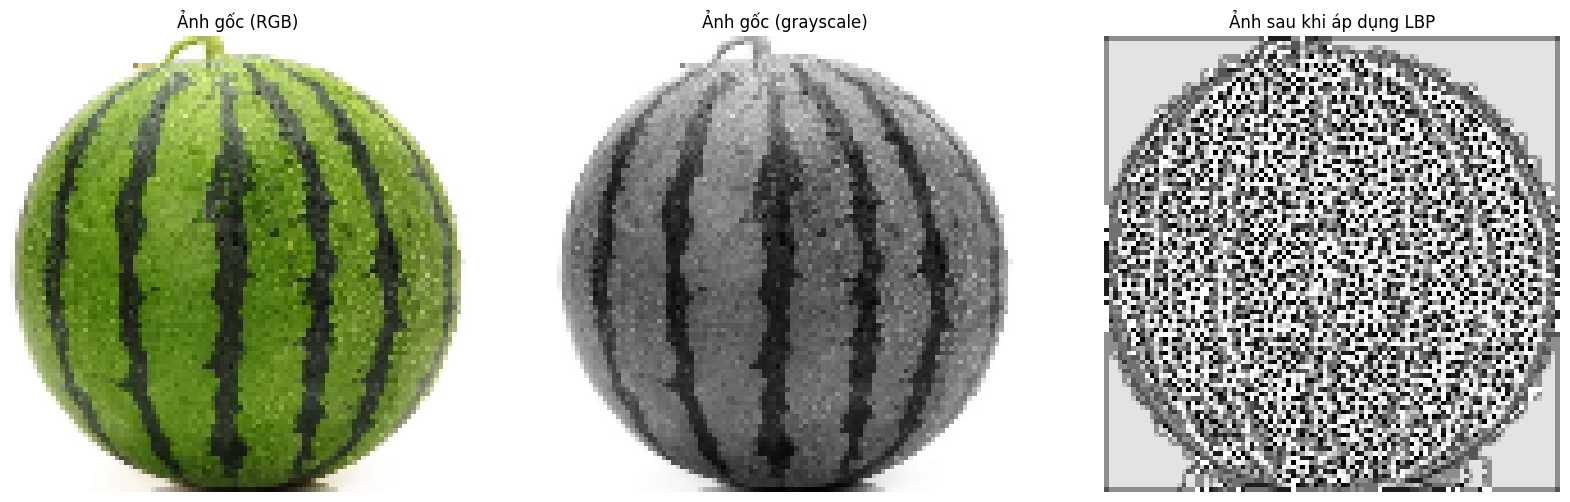

In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

# Tham số cho LBP
LBP_RADIUS = 1
LBP_POINTS = 8 * LBP_RADIUS

# Đọc ảnh và chuyển sang grayscale
image_path = 'Image_test/2.png'  # Đường dẫn tới ảnh của bạn

image = cv2.imread(image_path)
# In ra kích thước của ảnh
print("Kích thước ảnh:", image.shape)
image = cv2.resize(image, (100, 100))  # Thay đổi kích thước ảnh về 300x300
print("Kích thước ảnh sau khi thay đổi:", image.shape)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Áp dụng LBP
lbp = local_binary_pattern(gray, LBP_POINTS, LBP_RADIUS, method="uniform")
(hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, LBP_POINTS + 3), range=(0, LBP_POINTS + 2))
hist = hist.astype("float")
hist /= (hist.sum() + 1e-7)
print("Histogram LBP:", hist)
# In ra ma trix LBP
print("Ma trận LBP:", lbp)
# Vẽ histogram LBP
plt.figure(figsize=(10, 5))
plt.bar(range(0, LBP_POINTS + 2), hist, width=1)
plt.title('Histogram LBP')

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Ảnh gốc (RGB)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title('Ảnh gốc (grayscale)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(lbp, cmap='gray')
plt.title('Ảnh sau khi áp dụng LBP')
plt.axis('off')


Kích thước ảnh: (100, 100, 3)
Kích thước ảnh sau khi thay đổi: (100, 100, 3)
Histogram LBP: [0.0655 0.071  0.0411 0.0873 0.1079 0.129  0.0472 0.0856 0.2096 0.1558]
Ma trận LBP: [[3. 5. 5. ... 5. 5. 3.]
 [5. 8. 8. ... 8. 8. 5.]
 [5. 8. 8. ... 8. 8. 5.]
 ...
 [5. 8. 8. ... 8. 8. 5.]
 [5. 8. 8. ... 8. 8. 5.]
 [3. 5. 5. ... 5. 5. 3.]]


(np.float64(-0.5), np.float64(99.5), np.float64(99.5), np.float64(-0.5))

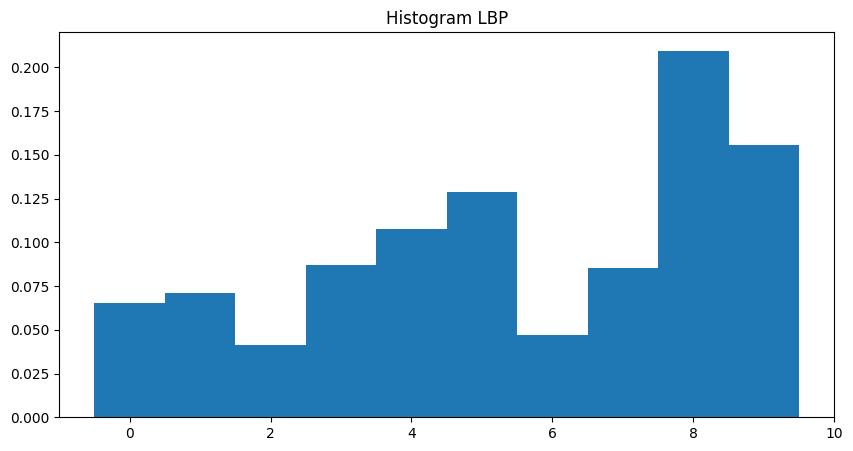

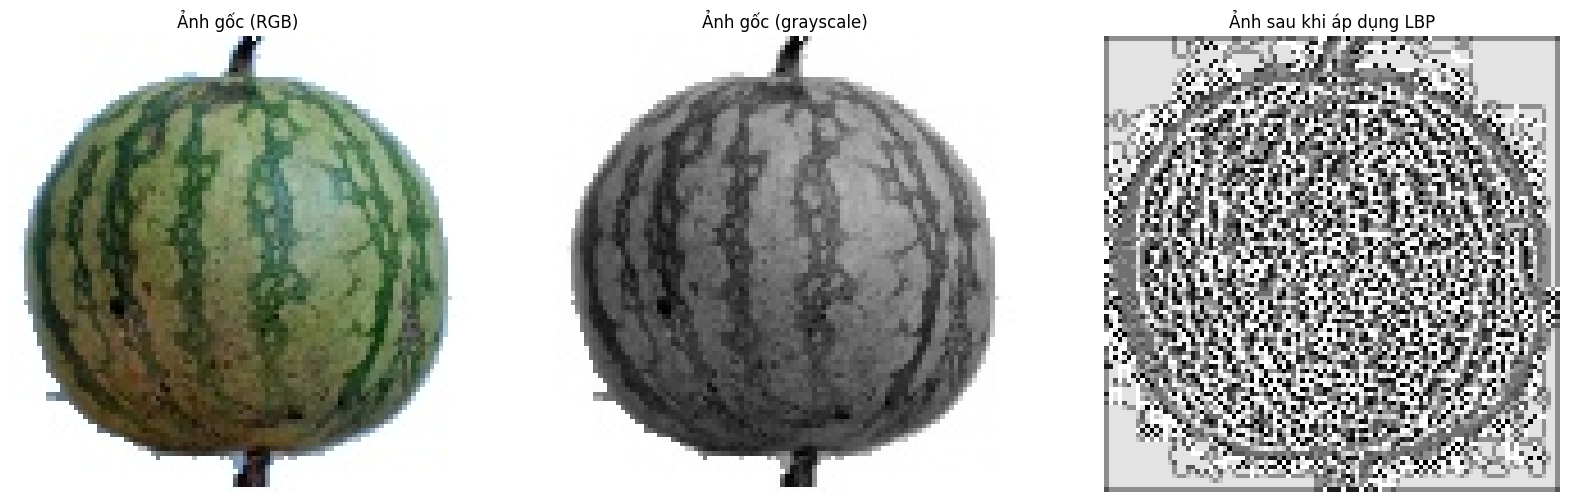

In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

# Tham số cho LBP
LBP_RADIUS = 1
LBP_POINTS = 8 * LBP_RADIUS

# Đọc ảnh và chuyển sang grayscale
image_path = 'Image_data/0_100.jpg'  # Đường dẫn tới ảnh của bạn

image = cv2.imread(image_path)
# In ra kích thước của ảnh
print("Kích thước ảnh:", image.shape)
image = cv2.resize(image, (100, 100))  # Thay đổi kích thước ảnh về 300x300
print("Kích thước ảnh sau khi thay đổi:", image.shape)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Áp dụng LBP
lbp = local_binary_pattern(gray, LBP_POINTS, LBP_RADIUS, method="uniform")
(hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, LBP_POINTS + 3), range=(0, LBP_POINTS + 2))
hist = hist.astype("float")
hist /= (hist.sum() + 1e-7)
print("Histogram LBP:", hist)
# In ra ma trix LBP
print("Ma trận LBP:", lbp)
# Vẽ histogram LBP
plt.figure(figsize=(10, 5))
plt.bar(range(0, LBP_POINTS + 2), hist, width=1)
plt.title('Histogram LBP')

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Ảnh gốc (RGB)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title('Ảnh gốc (grayscale)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(lbp, cmap='gray')
plt.title('Ảnh sau khi áp dụng LBP')
plt.axis('off')


Kích thước ảnh: (100, 100, 3)
Kích thước ảnh sau khi thay đổi: (100, 100, 3)
Histogram LBP: [0.18745853 0.24850697 0.         0.16788321 0.         0.04810883
 0.         0.33311214 0.         0.01493033]
Ma trận LBP: [[  7.  31.  31. ...  31.  31.   7.]
 [ 31. 255. 255. ... 255. 255.  31.]
 [ 31. 255. 255. ... 255. 255.  31.]
 ...
 [ 31. 255. 255. ... 255. 255.  31.]
 [ 31. 255. 255. ... 255. 255.  31.]
 [  7.  31.  31. ...  31.  31.   7.]]


(np.float64(-0.5), np.float64(99.5), np.float64(99.5), np.float64(-0.5))

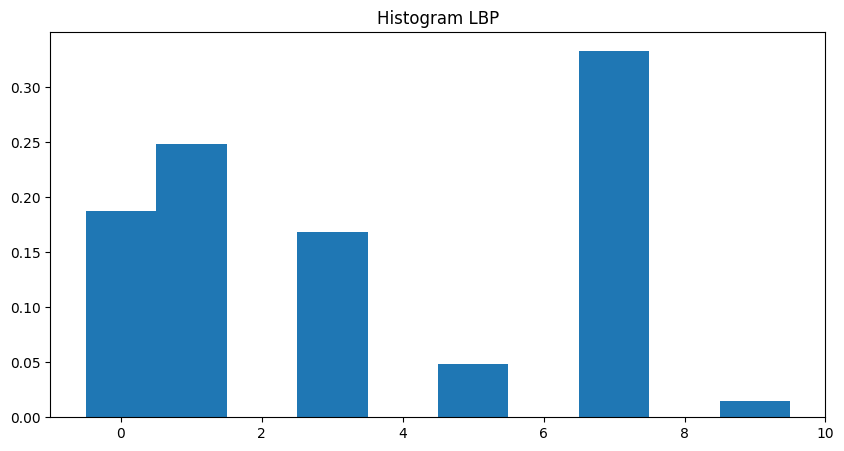

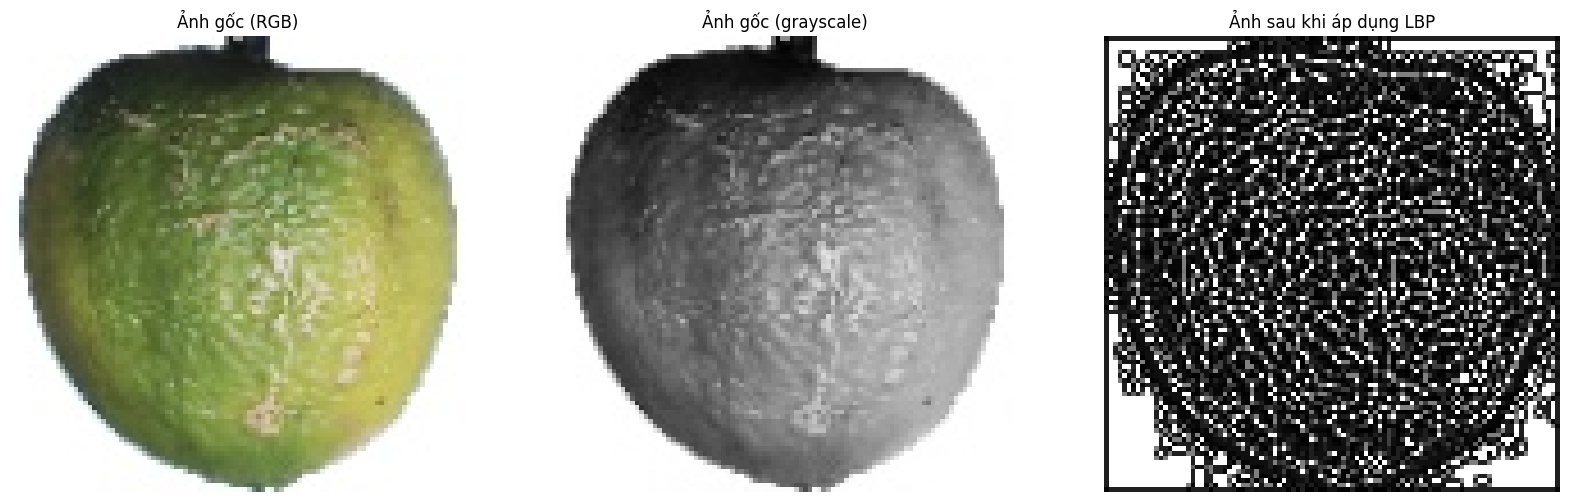

In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

# Tham số cho LBP
LBP_RADIUS = 1
LBP_POINTS = 8 * LBP_RADIUS

# Đọc ảnh và chuyển sang grayscale
image_path = 'Image_data/27_100.jpg'  # Đường dẫn tới ảnh của bạn

image = cv2.imread(image_path)
# In ra kích thước của ảnh
print("Kích thước ảnh:", image.shape)
image = cv2.resize(image, (100, 100))  # Thay đổi kích thước ảnh về 300x300
print("Kích thước ảnh sau khi thay đổi:", image.shape)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Áp dụng LBP
lbp = local_binary_pattern(gray, LBP_POINTS, LBP_RADIUS, method="ror")
(hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, LBP_POINTS + 3), range=(0, LBP_POINTS + 2))
hist = hist.astype("float")
hist /= (hist.sum() + 1e-7)
print("Histogram LBP:", hist)
# In ra ma trix LBP
print("Ma trận LBP:", lbp)
# Vẽ histogram LBP
plt.figure(figsize=(10, 5))
plt.bar(range(0, LBP_POINTS + 2), hist, width=1)
plt.title('Histogram LBP')

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Ảnh gốc (RGB)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title('Ảnh gốc (grayscale)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(lbp, cmap='gray')
plt.title('Ảnh sau khi áp dụng LBP')
plt.axis('off')


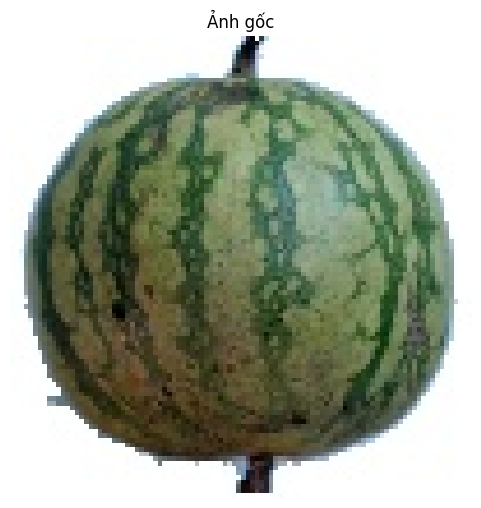

[0.0005662  0.01875324 0.00034509 0.0129284  0.0005662  0.0129051
 0.0008437  0.01214801 0.00049129 0.01055147 0.0008437  0.0108058
 0.00098252 0.00953857 0.00066894 0.00803421 0.00098252 0.0090723 ]


In [95]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gabor

def extract_gabor_features(image, frequencies=[0.1, 0.2, 0.3], thetas=[0, np.pi/4, np.pi/2]):
    image = image.astype(np.float32) / 255.0
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    features = []
    for freq in frequencies:
        for theta in thetas:
            real, imag = gabor(gray, frequency=freq, theta=theta)
            mean_val = real.mean()
            std_val = real.std()
            features.extend([mean_val, std_val])
    return np.array(features)

# Load ảnh
image = cv2.imread('Image_data/0_100.jpg')  # Đường dẫn tới ảnh của bạn

# Hiển thị ảnh gốc
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Ảnh gốc')
plt.axis('off')
plt.show()

# Áp dụng Gabor
filtered_results = extract_gabor_features(image)

print(filtered_results)
